In [1]:
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_dir = Path("data", "dataframes")
nws_df_path = data_dir / "national-weather-service.pkl"

In [3]:
nws_df = pd.read_pickle(nws_df_path)
nws_df.head()

,detailedForecast,shortForecast,startTime,endTime,icon,isDaytime,name,number,temperature,temperatureUnit,temperatureTrend,windDirection,windSpeed,forecast_type
0,A chance of rain showers and patchy fog before...,Chance Rain Showers then Partly Sunny,2021-03-25 06:00:00-04:00,2021-03-25 18:00:00-04:00,https://api.weather.gov/icons/land/day/rain_sh...,True,Today,1,72.0,F,None,S,5 mph,daily
1,A chance of rain showers after 2am. Mostly clo...,Mostly Cloudy then Chance Rain Showers,2021-03-25 18:00:00-04:00,2021-03-26 06:00:00-04:00,https://api.weather.gov/icons/land/night/bkn/r...,False,Tonight,2,54.0,F,None,S,5 to 9 mph,daily
2,"A chance of rain showers before 11am, then a c...",Chance Showers And Thunderstorms,2021-03-26 06:00:00-04:00,2021-03-26 18:00:00-04:00,"https://api.weather.gov/icons/land/day/tsra,50...",True,Friday,3,70.0,F,None,SW,9 to 18 mph,daily
3,"Partly cloudy, with a low around 45. West wind...",Partly Cloudy,2021-03-26 18:00:00-04:00,2021-03-27 06:00:00-04:00,https://api.weather.gov/icons/land/night/sct?s...,False,Friday Night,4,45.0,F,None,W,14 to 17 mph,daily
4,"Sunny, with a high near 55. Northwest wind 8 t...",Sunny,2021-03-27 06:00:00-04:00,2021-03-27 18:00:00-04:00,https://api.weather.gov/icons/land/day/few?siz...,True,Saturday,5,55.0,F,None,NW,8 to 13 mph,daily


<ipython-input-4-ac8bc38866fc>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates)


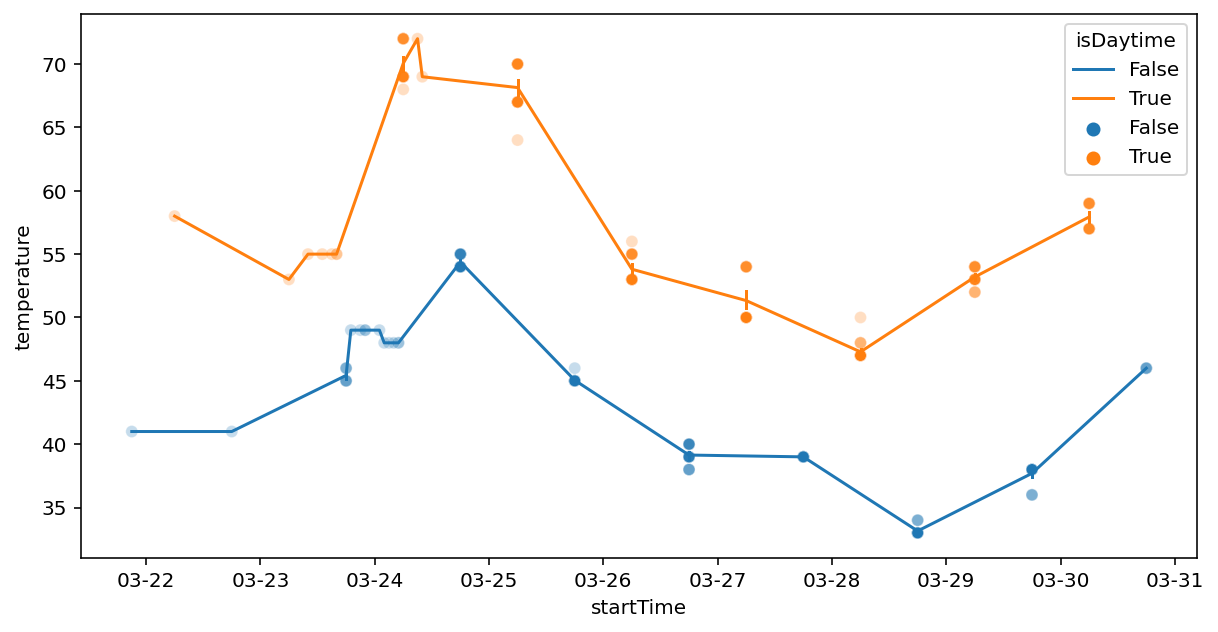

In [4]:
d = nws_df.copy()[nws_df["forecast_type"] == "daily"]
d["date"] = [st.date() for st in d["startTime"]]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    x="startTime",
    y="temperature",
    data=d,
    hue="isDaytime",
    ax=ax,
    err_style="bars",
    ci=89,
)
sns.scatterplot(
    x="startTime", y="temperature", data=d, hue="isDaytime", ax=ax, alpha=0.25
)
x_dates = d["startTime"].dt.strftime("%m-%d").sort_values().unique()
ax.set_xticklabels(labels=x_dates)

plt.show()

<ipython-input-5-c24b4c59afe6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates)


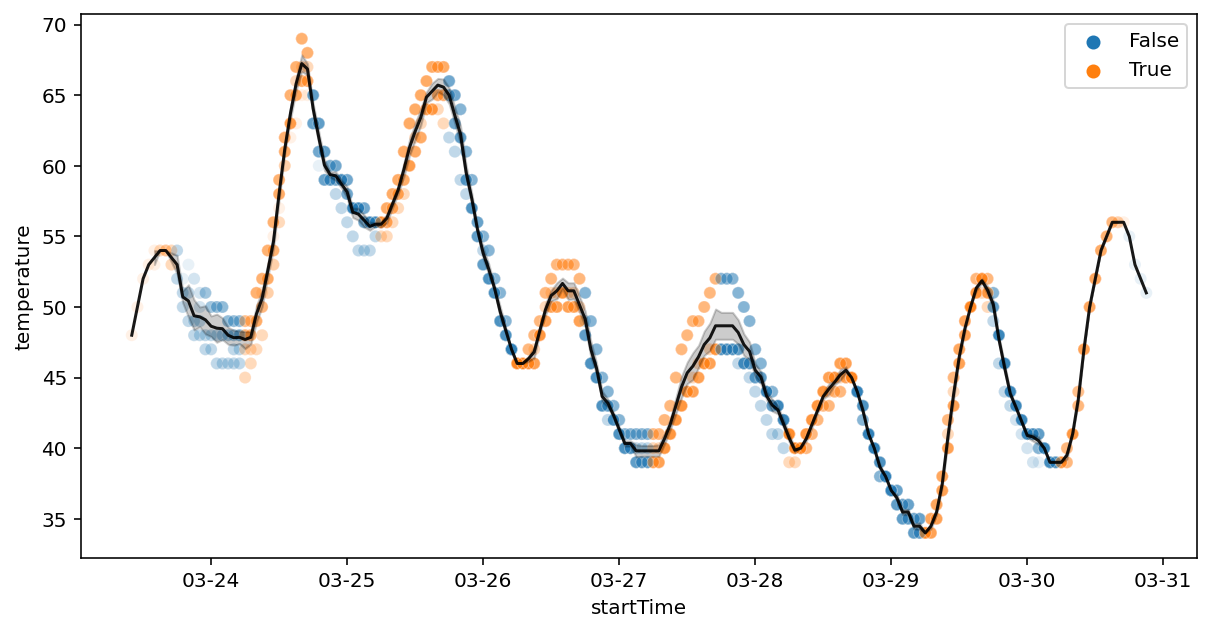

In [5]:
d = nws_df.copy()[nws_df["forecast_type"] == "hourly"]

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    x="startTime", y="temperature", data=d, hue="isDaytime", ax=ax, alpha=0.1
)
sns.lineplot(x="startTime", y="temperature", data=d, ax=ax, ci=95, color="k", alpha=0.9)
x_dates = d["startTime"].dt.strftime("%m-%d").sort_values().unique()
ax.set_xticklabels(labels=x_dates)

plt.show()

In [6]:
nws_df["name"].unique()

array(['Today', 'Tonight', 'Friday', 'Friday Night', 'Saturday',
       'Saturday Night', 'Sunday', 'Sunday Night', 'Monday',
       'Monday Night', 'Tuesday', 'Tuesday Night', 'Wednesday',
       'Wednesday Night', 'Thursday', 'Thursday Night', 'This Afternoon',
       'Overnight', ''], dtype=object)